In [1]:
from pandas import read_csv
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import metrics

In [2]:
# 导入数据
filename = 'wine.data'
names = ['class', 'Alcohol', 'MalicAcid', 'Ash', 'AlclinityOfAsh', 'Magnesium', 'TotalPhenols', 'Flavanoids',
         'NonflayanoidPhenols', 'Proanthocyanins', 'ColorIntensiyt', 'Hue', 'OD280/OD315', 'Proline']
dataset = read_csv(filename, names=names)
dataset['class'] = dataset['class'].replace(to_replace=[1, 2, 3], value=[0, 1, 2])
array = dataset.values
X = array[:, 1:13]
y = array[:, 0]

In [3]:
# 数据降维
pca = PCA(n_components=3)
X_scale = StandardScaler().fit_transform(X)
X_reduce = pca.fit_transform(scale(X_scale))

In [4]:
# 模型训练
model = KMeans(n_clusters=3)
model.fit(X_reduce)
labels = model.labels_
centers = model.cluster_centers_
print(model.transform(X_reduce))
#print(labels)

[[1.38478622 5.90667978 4.46889809]
 [2.3209606  5.30405954 3.09927695]
 [0.99109793 5.11395426 3.44281764]
 [2.14209642 6.12504462 5.21762681]
 [2.2296077  4.38125258 3.39231309]
 [1.21647092 5.27750262 4.17922036]
 [0.91167182 4.81421627 3.29865394]
 [0.76465526 4.37545948 3.21918076]
 [1.8362087  5.29712108 3.89394486]
 [1.17026502 5.39503405 3.7225563 ]
 [0.87217854 5.6514343  3.80873367]
 [1.42687711 4.2355949  2.42336189]
 [0.9877941  4.50456437 2.56114009]
 [1.68039192 6.01578135 4.36378394]
 [2.28049444 6.5676468  5.16457938]
 [0.71190392 4.62114913 3.38967951]
 [1.65078734 4.71464832 4.08916841]
 [1.23253607 4.48337688 3.4941009 ]
 [1.38461621 5.57366116 4.44645641]
 [0.70719589 4.82666877 3.59429682]
 [1.36978825 5.97443217 4.33613226]
 [1.30186114 4.06847858 2.40927967]
 [0.95175143 5.26489391 2.79509779]
 [1.56834522 4.60534803 1.71142751]
 [1.34223354 4.8196711  2.32615254]
 [4.00713252 5.49504492 4.61445561]
 [0.77508006 4.23447668 2.3887316 ]
 [2.24944069 4.05120413 1.77

In [5]:
# 输出模型的准确度
print('%.3f   %.3f   %.3f   %.3f   %.3f    %.3f' %(
    metrics.homogeneity_score(y, labels),
    metrics.completeness_score(y, labels),
    metrics.v_measure_score(y, labels),
    metrics.adjusted_rand_score(y, labels),
    metrics.adjusted_mutual_info_score(y,  labels),
    # 轮廓到中心的距离
    metrics.silhouette_score(X_reduce, labels)))

0.726   0.722   0.724   0.726   0.719    0.413


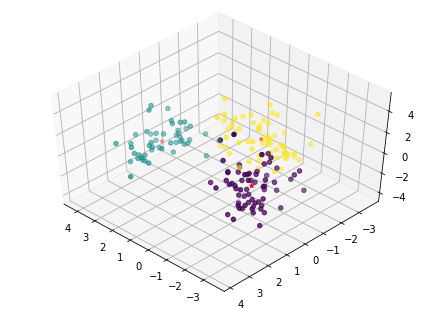

In [6]:
# 绘制模型的分布图
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], X_reduce[:, 2], c=labels.astype(np.float))
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='*', color='red')
plt.show()